## <font face="微软雅黑"><center>《机器学习》</center></font>

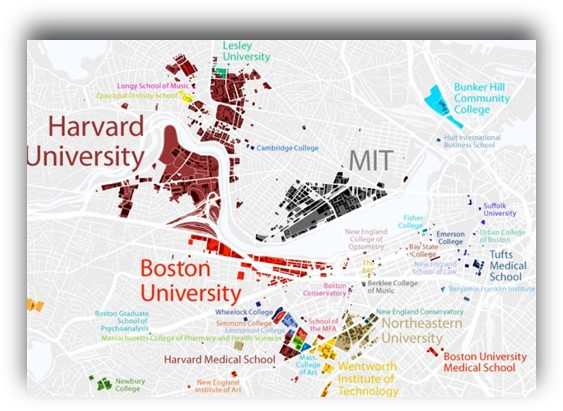



#  <font color=#0099ff  face="微软雅黑"><center>实验二 梯度下降法预测波士顿房价</center></font>

## 实验要求：
<hr width="100%" style="margin-top:10px;border:0.5px solid black;"/>

### 【实验目的】
<div style="margin-top:10px;text-indent:2em;dispaly=block"> 
通过本实验，深入了解回归算法的实现原理，掌握梯度下降法的参数优化
</div>

### 【实验环境】
<div style="margin-top:10px;text-indent:2em;dispaly=block"> Windows Anconda  Jupyter Notebook </div>
    
### 【实验内容】

在这个实验中将分析波士顿房价数据，在这个过程中将应用梯度下降法对波士顿房价进行预测


### 【预备知识】

机器学习流程、特征工程技巧、回归模型评价、梯度下降法


### 【实验背景】

通过机器学习预测房价走势


##  <font color='red'  face="微软雅黑">*注意*：所有注释后的空行均需填入代码</font> 

##  <font color='red'  face="微软雅黑">*注意*：最后交的是实验报告word文件</font> 

##  <font color='red'  face="微软雅黑">*注意*：实验报告务必写学号、姓名、班级</font> 

# 数据集字段说明

### 字段对应的中文解释，来自网上的说明：

#### CRIM：城镇人均犯罪率

#### ZN： 占地面积超过2.5万平方英尺的住宅用地比例

#### INDUS：城镇上非零售业务地区的 比例

#### CHAS：虚拟变量；如果土地在查尔斯河，取值1；否则为0

#### NOX：一氧化氮浓度

#### RM：平均每个居民房数

#### AGE：在1940年之前建成的所有者占用单位的比例

#### DIS： 与波士顿的5个就业中心之间的加权距离

#### RAD： 辐距离住房最近的公路入口编号

#### TAX：每10,000美元的全额物业税

#### PTRATIO：城镇师生比例大小

#### B：1000(Bk-0.63)^2,其中 Bk 指代城镇中黑人的比例

#### LSTAT：全部人口中地位较低人群的百分数大小

#### MEDV：目标变量，以1000美元来进行计算的自由住房的中位数大小


## 4 波士顿房价预测

## 4-1 读取数据

In [1]:
# 导入包
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [3]:
# 从从本地文件（HousingData.csv）中读取原始数据，并输出前五行数据

data = pd.read_csv("HousingData.csv")
data.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2

##  4-2 缺失值处理

###  删除缺失值

In [4]:
#删除有缺失的样本
data = data.dropna()

#重新检查数据集是否存在缺失值
data.duplicated()

0      False
1      False
2      False
3      False
5      False
       ...  
499    False
500    False
502    False
503    False
504    False
Length: 394, dtype: bool

## 4-3 划分数据

In [5]:
#将数据集划分为测试集和训练集
x =  data[['INDUS','RM','TAX','PTRATIO','LSTAT']]                           #去掉标签（房价）的所有特征
y =  data['MEDV']                            # 标签-房价

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8,random_state = 1)



## 4-4 使用梯度下降法需对特征进行标准化，请使用 StandardScaler进行标准化处理

fit：Compute the mean and std to be used for later scaling.计算用于以后缩放的mean和std


fit_transform：Fit to data, then transform it.在fit的基础上，进行标准化，降维，归一化等操作

In [8]:
# 从sklearn.preprocessing导入数据标准化模块 
from sklearn.preprocessing import StandardScaler

# 对X_train 和 X_test进行标准化
transfer = StandardScaler()
x_train = transfer.fit_transform(x_train)
x_test = transfer.transform(x_test)

# 归一化
def MaxMinNormalization(x,Max,Min):
    x = (x - Min)/(Max - Min)
    return x

# 零-均值归一化（z-score标准化）
def Z_ScoreNormalization(x,mu,sigma):
    x = (x-mu)/sigma;
    return x


In [10]:
x_train

array([[ 1.00093935,  0.25832713,  1.50643985,  0.75190813,  1.59933497],
       [-0.87568622,  0.47142906, -0.65131205, -0.91769011, -0.7335162 ],
       [-1.00107958, -1.02753282, -0.67489404, -0.91769011,  0.29456752],
       ...,
       [-0.9383829 ,  0.50622121, -0.96377339, -0.03651326, -0.85149301],
       [-1.26754046,  1.65146287, -1.11116082, -0.08289099, -0.85991993],
       [-0.59355117, -0.30704534, -1.04631035, -0.31477963, -0.42733826]])

## 4-5 使用Sklearn 封装好的梯度下降回归 SGDRegressor 进行训练和预测

In [15]:
# 从sklearn.linear_model导入SGDRegressor。
from sklearn.linear_model import SGDRegressor


# 调用SGDRegressor
model = SGDRegressor()

# 使用训练数据进行参数估计。
# 预估器

estimator = model.fit(x_train,y_train)

# 对测试数据进行预测。
y_predict = estimator.predict(x_test)


# 使用MSE和判定系数R2做性能评估
mse = np.average((y_predict - np.array(y_test)) **2)   # 均方误差

r2_test = estimator.score(x_test,y_test)     # 测试数据确定系数


# The mean squared error   #均方误差
print("Mean squared error:%.2f"%mean_squared_error(y_test,y_predict))


# The coefficient of determination: 1 is perfect prediction  #判定系数
print("Coefficient of determination:%.2f"%r2_score(y_test,y_predict))


Mean squared error:101803.53
Coefficient of determination:-1139.76


# 练习2 不使用sklearn封装好的API，自己建立梯度下降法求解（附加挑战题，答对加分）

In [16]:
#已为大家构造好了面积，房间数，房价，其中X表示自变量，Y表示因变量

area = np.array([137.97,104.50,100.00,124.32,79.20,99.00,124.00,114.00,106.69,138.05,
           53.75,46.91,68.00,63.02,81.26,86.21])             #面积
room = np.array([3,2,2,3,1,2,3,2,2,3,1,1,1,1,2,2])              #房间数
price = np.array([145.00,110.00,93.00,116.00,65.32,104.00,118.00,91.00,62.00,133.00,
              51.00,45.00,75.50,69.50,75.69,95.30])              #房价
num = len(area)
x0 = np.ones(num)
x1 = (area - area.min())/(area.max() - area.min())           #对房间面积进行标准化
x2 = (room - room.min())/(room.max() - room.min())            #对房间数进行标准化
X = np.stack((x0,x1,x2), axis = 1)
Y = price.reshape(-1,1)
print("特征")
print(X)
print("标签")
print(Y)

特征
[[1.         0.99912223 1.        ]
 [1.         0.63188501 0.5       ]
 [1.         0.58251042 0.5       ]
 [1.         0.84935264 1.        ]
 [1.         0.3542901  0.        ]
 [1.         0.57153829 0.5       ]
 [1.         0.84584156 1.        ]
 [1.         0.73612025 0.5       ]
 [1.         0.65591398 0.5       ]
 [1.         1.         1.        ]
 [1.         0.07504937 0.        ]
 [1.         0.         0.        ]
 [1.         0.23140224 0.        ]
 [1.         0.17676103 0.        ]
 [1.         0.37689269 0.5       ]
 [1.         0.43120474 0.5       ]]
标签
[[145.  ]
 [110.  ]
 [ 93.  ]
 [116.  ]
 [ 65.32]
 [104.  ]
 [118.  ]
 [ 91.  ]
 [ 62.  ]
 [133.  ]
 [ 51.  ]
 [ 45.  ]
 [ 75.5 ]
 [ 69.5 ]
 [ 75.69]
 [ 95.3 ]]


Min-Max归一化的算法是：先找出数据集通常是一列数据）的最大值和最小值，然后所有元素先减去最小值，再除以最大值和最小值的差，结果就是归一化后的数据了。经Min-Max归一化后，数据集整体将会平移到[0,1]的区间内，数据分布不变。

np.stack([arrays1,array2,array3],axis=0)。第二个参数是axis，这个参数表示从哪一个维度进行堆叠以及堆叠的内容，这个维度是相对于堆叠的数组来说的。整个函数的输出为一个新数组

reshape(-1,1)表示（任意行，1列）

In [18]:
#设置超参数
learn_rate = 0.001
iter = 500
display_step = 50

#初始化w
np.random.seed(612)
W = np.random.randn(3,1)

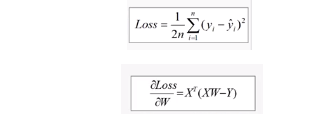

#### numpy.matmul() 函数返回两个数组的矩阵乘积。当两个数组都是二维数组的时候，就是数学上的两个矩阵的乘积。

In [ ]:
#训练模型














